#<p style="color: black">_Projekt Big Data_</p>
<p style="color: grey">Bartosz Kalinka 217120 <br/> Paweł Kolak <br/> Dawid Heller 218489 <br/> Śr 9:15</p>

## Zbiór danych
<p>
Informacje o zbiorze danych:
<ul>
  <li>Plik .csv pochodzi ze strony "http://eforexcel.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/". <br/>
  Baza składa się dokładnie z 50 000 krotek (wierszy).</li>
  <li>Plik został zaimporotwany w zakładce "Data". Po wygenerowaniu tabeli, zostraje on przypisana do zmiennej "raw_data"</li>
  <li><table>
      <tr>
        <th>Name</th>
        <td>Region</td> 
        <td>Country</td>
        <td>Item Type</td>
        <td>Sales Channel</td>
        <td>Order Priority</td>
        <td>Order Date</td>
        <td>Order ID</td>
        <td>Ship Date</td>
        <td>Units Sold</td>
        <td>Unit Price</td>
        <td>Unit Cost</td>
        <td>Total Revenue</td>
        <td>Total Cost</td>
        <td>Total Profit</td>
      </tr>
      <tr>
        <th>Type</th>
        <td>String</td>
        <td>String</td>
        <td>String</td>
        <td>String</td>
        <td>String</td>
        <td>String</td>
        <td>String</td>
        <td>String</td>
        <td>Integer</td>
        <td>Double</td>
        <td>Double</td>
        <td>Double</td>
        <td>Double</td>
        <td>Double</td>
      </tr>
    </table>
  </li>
</ul>
</p>

In [3]:
local_file_path = '/FileStore/tables/sales_records.csv'
raw_data_test = sc.textFile(local_file_path)

## Analiza danych

### _Zadanie 1 (Import danych)_

#### Załadowanie danych do RDD

In [7]:
local_file_path = '/FileStore/tables/sales_records.csv'
raw_data = sc.textFile(local_file_path)

#### Załadowanie danych do DataFrame (moduł Apache Spark SQL)

In [9]:
from pyspark.sql.types import *

csv_data_rdd = raw_data.map(lambda row: row.split(','))

data_df = spark.createDataFrame(csv_data_rdd,('Region','Country','ItemType','SalesChannel','OrderPriority','OrderDate','OrderID','ShipDate','UnitsSold','UnitPrice','UnitCost','TotalRevenue','TotalCost','TotalProfit'))

data_df = data_df.withColumn("UnitsSold", data_df['UnitsSold'].cast(IntegerType()))
data_df = data_df.withColumn("UnitPrice", data_df['UnitPrice'].cast(DoubleType()))
data_df = data_df.withColumn("UnitCost", data_df['UnitCost'].cast(DoubleType()))
data_df = data_df.withColumn("TotalRevenue", data_df['TotalRevenue'].cast(DoubleType()))
data_df = data_df.withColumn("TotalCost", data_df['TotalCost'].cast(DoubleType()))
data_df = data_df.withColumn("TotalProfit", data_df['TotalProfit'].cast(DoubleType()))

data_df.printSchema()
# Show rows
data_df.show()

root
-- Region: string (nullable = true)
-- Country: string (nullable = true)
-- ItemType: string (nullable = true)
-- SalesChannel: string (nullable = true)
-- OrderPriority: string (nullable = true)
-- OrderDate: string (nullable = true)
-- OrderID: string (nullable = true)
-- ShipDate: string (nullable = true)
-- UnitsSold: integer (nullable = true)
-- UnitPrice: double (nullable = true)
-- UnitCost: double (nullable = true)
-- TotalRevenue: double (nullable = true)
-- TotalCost: double (nullable = true)
-- TotalProfit: double (nullable = true)

+--------------------+-----------+---------------+------------+-------------+----------+---------+----------+---------+---------+--------+------------+----------+-----------+
 Region| Country| ItemType|SalesChannel|OrderPriority| OrderDate| OrderID| ShipDate|UnitsSold|UnitPrice|UnitCost|TotalRevenue| TotalCost|TotalProfit|
+--------------------+-----------+---------------+------------+-------------+----------+---------+----------+---------+---------+--------+------------+----------+-----------+
 Sub-Saharan Africa| Namibia| Household| Offline| M| 8/31/2015|897751939|10/12/2015| 3604| 668.27| 502.54| 2408445.08|1811154.16| 597290.92|
 Europe| Iceland| Baby Food| Online| H|11/20/2010|599480426| 1/9/2011| 8435| 255.28| 159.42| 2153286.8| 1344707.7| 808579.1|
 Europe| Russia| Meat| Online| L| 6/22/2017|538911855| 6/25/2017| 4848| 421.89| 364.69| 2045322.72|1768017.12| 277305.6|
 Europe| Moldova | Meat| Online| L| 2/28/2012|459845054| 3/20/2012| 7225| 421.89| 364.69| 3048155.25|2634885.25| 413270.0|
 Europe| Malta| Cereal| Online| M| 8/12/2010|626391351| 9/13/2010| 1975| 205.7| 117.11| 406257.5| 231292.25| 174965.25|
 Asia| Indonesia| Meat| Online| H| 8/20/2010|472974574| 8/27/2010| 2542| 421.89| 364.69| 1072444.38| 927041.98| 145402.4|
 Sub-Saharan Africa| Djibouti| Household| Online| M| 2/3/2011|854331052| 3/3/2011| 4398| 668.27| 502.54| 2939051.46|2210170.92| 728880.54|
 Europe| Greece| Household| Online| L| 9/11/2015|895509612| 9/26/2015| 49| 668.27| 502.54| 32745.23| 24624.46| 8120.77|
 Sub-Saharan Africa| Cameroon| Cosmetics| Offline| M| 1/31/2014|241871583| 2/4/2014| 4031| 437.2| 263.33| 1762353.2|1061483.23| 700869.97|
 Sub-Saharan Africa| Nigeria| Cosmetics| Online| C|11/21/2015|409090793| 12/7/2015| 7911| 437.2| 263.33| 3458689.2|2083203.63| 1375485.57|
 Sub-Saharan Africa| Senegal| Fruits| Offline| M| 8/29/2016|733153569| 10/5/2016| 5288| 9.33| 6.92| 49337.04| 36592.96| 12744.08|
Middle East and N...|Afghanistan| Cosmetics| Offline| L|10/21/2016|620358741| 12/1/2016| 6792| 437.2| 263.33| 2969462.4|1788537.36| 1180925.04|
 Asia| India| Vegetables| Online| C| 3/21/2010|897317636| 4/5/2010| 5084| 154.06| 90.93| 783241.04| 462288.12| 320952.92|
Middle East and N...| Lebanon| Vegetables| Online| L|10/15/2010|660954082|11/19/2010| 9855| 154.06| 90.93| 1518261.3| 896115.15| 622146.15|
Middle East and N...| Turkey|Office Supplies| Online| L| 10/4/2010|428504407|11/13/2010| 2831| 651.21| 524.96| 1843575.51|1486161.76| 357413.75|
Middle East and N...| Iraq| Cosmetics| Offline| M|10/14/2014|787517440|10/19/2014| 2766| 437.2| 263.33| 1209295.2| 728370.78| 480924.42|
 Sub-Saharan Africa| Rwanda| Personal Care| Offline| M| 6/15/2013|145854508| 7/8/2013| 445| 81.73| 56.67| 36369.85| 25218.15| 11151.7|
 Europe| Ukraine| Baby Food| Offline| M| 5/7/2017|581689441| 5/29/2017| 3687| 255.28| 159.42| 941217.36| 587781.54| 353435.82|
 Europe| Finland|Office Supplies| Online| H| 5/21/2015|193508565| 7/3/2015| 2339| 651.21| 524.96| 1523180.19|1227881.44| 295298.75|
 Sub-Saharan Africa|South Sudan| Beverages| Offline| H| 6/28/2016|750110709| 7/14/2016| 3283| 47.45| 31.79| 155778.35| 104366.57| 51411.78|
+--------------------+-----------+---------------+------------+-------------+----------+---------+----------+---------+---------+--------+------------+----------+-----------+
only showing top 20 rows

### _Zadanie 2 (Agregacja)_

Na podstawie ramki RDD i DSL DataFrame należy wykonać funkcje agregującą dane (dwie różne, nie trywialne) i opisać uzyskane wyniki.</p>

In [11]:
# agregacja danych z wykorzystaniem RDD
print(csv_data_rdd.count()) #liczba wszystkich rekordów

normal_raw_data_rdd2 = csv_data_rdd.filter(lambda row: 'Europe' in row)


def fn(x):
  sum = 0
  for line in x.collect():
    row = line[13] # rodzaj interakcji, zawsze na tej pozycji
    sum += float(row)
  return int(sum)


# print(normal_raw_data_rdd2.count()) #liczba rekrodów, po filtrowaniu (Dane z Europy)
# print(normal_raw_data_rdd2.take(1)) #pierwsyz rekord, po filtrowaniu
print(fn(normal_raw_data_rdd2))




50000
4989882518

In [12]:
# agregacja danych z wykorzystaniem DSL Apache Spark SQL (DataFrame)
df = data_df

df.groupBy("ItemType")\
  .mean("UnitPrice")\
  .show()

+---------------+------------------+
 ItemType| avg(UnitPrice)|
+---------------+------------------+
 Baby Food|255.28000000001336|
 Cereal| 205.7000000000074|
 Meat| 421.8900000000118|
 Household| 668.2700000000142|
 Vegetables|154.05999999999798|
 Beverages| 47.44999999999823|
Office Supplies| 651.2099999999808|
 Cosmetics|437.19999999998475|
 Personal Care| 81.73000000000143|
 Fruits| 9.330000000000238|
 Snacks|152.57999999999817|
 Clothes|109.27999999999894|
+---------------+------------------+

W tabeli powyżej wyliczono średnią cenę produktu dla pojedynczego przedmiotu.

### _Zadanie 3 (SQL)_

Celem będzie weryfikacja ile wynosi suma całkowita dla danego kraju.

In [15]:
df.createOrReplaceTempView("data")
spark.sql("SELECT d.Country, SUM(TotalCost) FROM data as d GROUP BY d.Country").show()

+-----------+--------------------+
 Country| sum(TotalCost)|
+-----------+--------------------+
 Chad|2.5308382585999995E8|
 Russia|2.2760509290000004E8|
 Yemen| 2.3083803396E8|
 Senegal|2.1522267383999997E8|
 Sweden|2.6482067041000012E8|
 Kiribati|2.3993827720000002E8|
 Eritrea|2.3776415177999997E8|
Philippines| 2.4821260845E8|
 Djibouti|2.7300496303999984E8|
 Tonga|2.7051040985999995E8|
 Malaysia|2.7112862332000005E8|
 Singapore|2.9113274692999995E8|
 Fiji|2.0600039453999996E8|
 Turkey|2.4592890510999998E8|
 Malawi|2.2402022392000005E8|
 Iraq| 2.8903908828E8|
 Germany|2.2520169204999995E8|
 Comoros| 2.120897426900001E8|
Afghanistan|2.5469563817999995E8|
 Cambodia|2.3891657371999997E8|
+-----------+--------------------+
only showing top 20 rows

W tabeli powyżej udało obliczyć sumę całkowitą przychodu dla poszeczólnych krajów.

### _Zadanie 4 (UDF)_
Celem zadania będzie roszczerzenie tabeli wynikowej o dodatkową kolumnę zawierajacącą wszystkie możliwe <br/> wartości TotalCost przekowerowane z Dolarów Amerykańskich na walutę Euro, wraz z zanakiem walutowym.

In [18]:
from pyspark.sql.functions import udf

# dataFrame_1 = spark.createDataFrame(df.select('').

DataFrame = spark.createDataFrame(data_df.collect())
DataFrame.createOrReplaceTempView("Data")


df.take(10)

print('22e')

def from_USD_to_EUR(a):
  ojro = a*0.88
  return str(ojro)+" €"

upper_udf = udf(from_USD_to_EUR, StringType())

DataFrame.withColumn('FromUSDToEUR', upper_udf('TotalCost')).show()



22e
+--------------------+-----------+---------------+------------+-------------+----------+---------+----------+---------+---------+--------+------------+----------+-----------+--------------------+
 Region| Country| ItemType|SalesChannel|OrderPriority| OrderDate| OrderID| ShipDate|UnitsSold|UnitPrice|UnitCost|TotalRevenue| TotalCost|TotalProfit| FromUSDToEUR|
+--------------------+-----------+---------------+------------+-------------+----------+---------+----------+---------+---------+--------+------------+----------+-----------+--------------------+
 Sub-Saharan Africa| Namibia| Household| Offline| M| 8/31/2015|897751939|10/12/2015| 3604| 668.27| 502.54| 2408445.08|1811154.16| 597290.92| 1593815.6608 €|
 Europe| Iceland| Baby Food| Online| H|11/20/2010|599480426| 1/9/2011| 8435| 255.28| 159.42| 2153286.8| 1344707.7| 808579.1| 1183342.776 €|
 Europe| Russia| Meat| Online| L| 6/22/2017|538911855| 6/25/2017| 4848| 421.89| 364.69| 2045322.72|1768017.12| 277305.6| 1555855.0656 €|
 Europe| Moldova | Meat| Online| L| 2/28/2012|459845054| 3/20/2012| 7225| 421.89| 364.69| 3048155.25|2634885.25| 413270.0| 2318699.02 €|
 Europe| Malta| Cereal| Online| M| 8/12/2010|626391351| 9/13/2010| 1975| 205.7| 117.11| 406257.5| 231292.25| 174965.25| 203537.18 €|
 Asia| Indonesia| Meat| Online| H| 8/20/2010|472974574| 8/27/2010| 2542| 421.89| 364.69| 1072444.38| 927041.98| 145402.4| 815796.9423999999 €|
 Sub-Saharan Africa| Djibouti| Household| Online| M| 2/3/2011|854331052| 3/3/2011| 4398| 668.27| 502.54| 2939051.46|2210170.92| 728880.54| 1944950.4096 €|
 Europe| Greece| Household| Online| L| 9/11/2015|895509612| 9/26/2015| 49| 668.27| 502.54| 32745.23| 24624.46| 8120.77| 21669.5248 €|
 Sub-Saharan Africa| Cameroon| Cosmetics| Offline| M| 1/31/2014|241871583| 2/4/2014| 4031| 437.2| 263.33| 1762353.2|1061483.23| 700869.97| 934105.2424 €|
 Sub-Saharan Africa| Nigeria| Cosmetics| Online| C|11/21/2015|409090793| 12/7/2015| 7911| 437.2| 263.33| 3458689.2|2083203.63| 1375485.57| 1833219.1944 €|
 Sub-Saharan Africa| Senegal| Fruits| Offline| M| 8/29/2016|733153569| 10/5/2016| 5288| 9.33| 6.92| 49337.04| 36592.96| 12744.08|32201.804799999998 €|
Middle East and N...|Afghanistan| Cosmetics| Offline| L|10/21/2016|620358741| 12/1/2016| 6792| 437.2| 263.33| 2969462.4|1788537.36| 1180925.04|1573912.8768000002 €|
 Asia| India| Vegetables| Online| C| 3/21/2010|897317636| 4/5/2010| 5084| 154.06| 90.93| 783241.04| 462288.12| 320952.92| 406813.5456 €|
Middle East and N...| Lebanon| Vegetables| Online| L|10/15/2010|660954082|11/19/2010| 9855| 154.06| 90.93| 1518261.3| 896115.15| 622146.15| 788581.332 €|
Middle East and N...| Turkey|Office Supplies| Online| L| 10/4/2010|428504407|11/13/2010| 2831| 651.21| 524.96| 1843575.51|1486161.76| 357413.75| 1307822.3488 €|
Middle East and N...| Iraq| Cosmetics| Offline| M|10/14/2014|787517440|10/19/2014| 2766| 437.2| 263.33| 1209295.2| 728370.78| 480924.42| 640966.2864 €|
 Sub-Saharan Africa| Rwanda| Personal Care| Offline| M| 6/15/2013|145854508| 7/8/2013| 445| 81.73| 56.67| 36369.85| 25218.15| 11151.7| 22191.972 €|
 Europe| Ukraine| Baby Food| Offline| M| 5/7/2017|581689441| 5/29/2017| 3687| 255.28| 159.42| 941217.36| 587781.54| 353435.82| 517247.7552 €|
 Europe| Finland|Office Supplies| Online| H| 5/21/2015|193508565| 7/3/2015| 2339| 651.21| 524.96| 1523180.19|1227881.44| 295298.75| 1080535.6672 €|
 Sub-Saharan Africa|South Sudan| Beverages| Offline| H| 6/28/2016|750110709| 7/14/2016| 3283| 47.45| 31.79| 155778.35| 104366.57| 51411.78| 91842.5816 €|
+--------------------+-----------+---------------+------------+-------------+----------+---------+----------+---------+---------+--------+------------+----------+-----------+--------------------+
only showing top 20 rows

_<h2>
  Opis uzyskanych wyników<h2/>_
  Dane prezentowne powyżej są rozszerzone o dodatkową kolumnę zawierajacącą wszystkie możliwe <br/> wartości TotalCost przekowerowane z Dolarów Amerykańskich na walutę Euro, wraz z zanakiem walutowym.

### _Zadanie 5 (MLlib)_
Do zadania wybrano model regresji liniowej. <br/>
W badaniu chcemy przewidzieć jakie będą całkowite zyski 'TotalProfit', <br/>
w raz ze wrzostem liczby przedanych produktów 'UnitsSold'

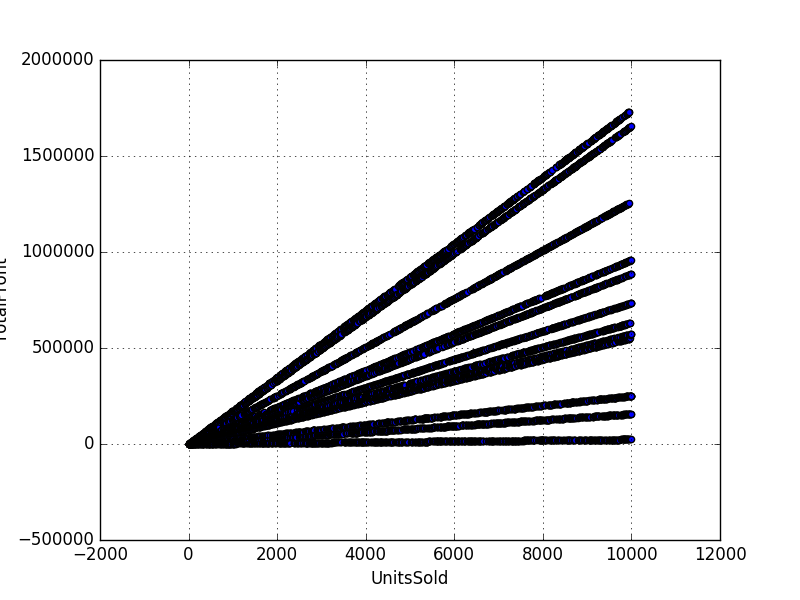

In [21]:
import matplotlib.pyplot as plt
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

df = data_df

# def change_date_to_int(date):
#   dates = date.split('/')
#   sum = 0
#   for d in dates:
#     sum+=int(d)
#   return sum

name_1 = 'UnitsSold'
list_2 = df.select(name_1).collect()
name_list_1 = [float(row[name_1]) for row in list_2]
# print(name_list_1)

name_2 = 'TotalProfit'
list_2 = df.select(name_2).collect()
name_list_2 = [float(row[name_2]) for row in list_2]
# print(name_list_2)

dict1 = {}
for val_1, val_2 in zip(name_list_1, name_list_2):
  dict1[val_1] = val_2
  #   val_1 = int(val_1)
#   val_2 = int(val_2)
#   if not dict1.get(val_1): 
#     dict1[val_1] = val_2
#   else:
#     dict1[val_1] = dict1[val_1]+val_2 

name_list_1 = list(dict1.keys())
name_list_2 = list(dict1.values())

# Wykres #
fig, ax = plt.subplots()
ax.scatter(name_list_1, name_list_2, c='b')
ax.set_xlabel(name_1)
ax.set_ylabel(name_2)
ax.grid(True)
display(fig)


In [22]:
data = []

# Do modelu RDD #
for name_1, name_2 in zip(name_list_1, name_list_2):
  data.append((name_1, name_2))
rdd = spark.sparkContext.parallelize(data)

# Tworzenie krotek #
def convert(row):
  return (float(row[1]), Vectors.dense(row[0]))
features_rdd = rdd.map(convert)
dataset_df = spark.createDataFrame(features_rdd, ["label", "features"])

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(dataset_df)

# Model #
print("MODEL")
print("Coefficients: [{}]".format(lr_model.coefficients))
print("Intercept: [{}]".format(lr_model.intercept))

# Statystyki trenowania #
print("\nTRAINING STATS")
print("numIterations: {}".format(lr_model.summary.totalIterations))
print("objectiveHistory: {}".format(lr_model.summary.objectiveHistory))
print("RMSE: {}".format(lr_model.summary.rootMeanSquaredError))
print("r2: {}".format(lr_model.summary.r2))
lr_model.summary.residuals.show()

train_df, test_df = dataset_df.randomSplit([0.6, 0.2], seed=12345)
print("Ilość elementów w zbiorze treningowym: {}".format(train_df.count()))
print("Ilość elementów w zbiorze testowym: {}".format(test_df.count()))

paramGrid = ParamGridBuilder() \
  .addGrid(lr.regParam, [0.1, 0.01]) \
  .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
  .build()

# Kroswalidacja #
crossval = CrossValidator(
  estimator=lr,
  estimatorParamMaps=paramGrid,
  evaluator=RegressionEvaluator(),
  numFolds=2
)

# Trenowanie #
cv_model = crossval.fit(train_df)

# Predykcja danych #
predicted_df = cv_model.transform(test_df)
predicted_df \
  .withColumnRenamed('label', 'true_value') \
  .select("true_value", "prediction") \
  .show()


MODEL
Coefficients: [[78.0695734621]]
Intercept: [748.7544737643493]

TRAINING STATS
numIterations: 7
objectiveHistory: [0.4999999999999998, 0.4432935330344312, 0.3541497053230875, 0.3318637483952515, 0.3262922591632926, 0.32489938685530284, 0.3244350960859729]
RMSE: 306389.6678095463
r2: 0.3511306110069129
+-------------------+
 residuals|
+-------------------+
 -700.5740472264687|
 -727.713620688588|
 -461.3531941507073|
 -840.4727676128268|
 -507.852341074946|
 -838.3919145370653|
 -78.15148799918484|
 -363.311061461304|
 113.44936507657667|
-1505.3502083855428|
 -978.319781847662|
 -804.3093553097813|
-1020.0589287719007|
 -1040.92850223402|
 566.1519243038604|
 -580.4276491582586|
 741.4727773796221|
 -1872.126796082497|
-1145.2763695446167|
 -538.3459430067362|
+-------------------+
only showing top 20 rows

Ilość elementów w zbiorze treningowym: 7472
Ilość elementów w zbiorze testowym: 2471
+----------+------------------+
true_value| prediction|
+----------+------------------+
 132.55| 5733.617807417075|
 177.18|1571.9387451890748|
 195.21| 7775.196215302509|
 339.81|12486.531002730433|
 356.68|13036.186727930357|
 359.09| 13114.70897438749|
 636.24|22144.767316957677|
 689.26| 23872.25673901458|
 743.6|2435.6834562175277|
 852.04| 4084.650631817301|
 876.96| 5812.140053874207|
 944.72|32195.614863470582|
 1096.2| 6911.451504274055|
 1174.5| 7304.062736559716|
 1202.59|40597.495234383714|
 1260.43| 42482.02914935489|
 1265.25| 42639.07364226915|
 1286.94|43345.773860383335|
 1299.78| 7932.240708216772|
 1421.9| 47743.01966198273|
+----------+------------------+
only showing top 20 rows

W uzyskanej tabeli powyżej wywnioskować można, że dane, które otrzymaliśmy jako wartośći predykcji podczas regresji liniowej <br/> są mocno zwyżone z powodu zbytniego rozrzutu danych uczących, które można zaobserwowwać na wykresie.

## Podsumowanie



### Dystrybucja notatnika
1. Wyeksportować notatnik do formatu `IPython Notebook`
2. Utworzyć archiwum ZIP zawierająca ww. notatnik i plik z użytymi danymi
3. Archiwum powinno być zawierać numery indeksów autorów projektu (np. `XXX_YYY.zip`)
4. Archiwum należy wysłać pod adres `norbert.kozlowski@pwr.edu.pl`.